# Case Study 2 - Predicting Hospital Readmittance

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
    - [Scope](#scope)
    - [Introduction](#introduction)
    - [Methods](#methods)
    - [Results](#results)
* [Data Evaluation](#data-evaluation)
    - [Loading Data](#loading-data) 
    - [Data Summary](#data-summary)
    - [Missing Values](#missing-values)
    - [Feature Removal](#feature-removal)
    - [Exploratory Data Analysis (EDA)](#eda)
    - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
    - [Sampling & Scaling Data](#sampling-scaling-data)
    - [Proposed Method](#proposed-metrics)
    - [Evaluation Metrics](#evaluation-metrics)
    - [Feature Selection](#feature-selection)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [Model](#model)
    - [Performance Analysis](#performance-analysis)
* [Model Interpretability & Explainability](#model-explanation)
    - [Examining Feature Importance](#examining-feature-importance)
* [Conclusion](#conclusion)
    - [Final Model Proposal](#final-model-proposal)
    - [Future Considerations and Model Enhancements](#model-enhancements)
    - [Alternative Modeling Approaches](#alternative-modeling-approaches)

# Business Understanding & Executive Summary <a id='business-understanding'/>

### Scope <a id='scope'/>


### Introduction <a id='introduction'/>


### Methods <a id='methods'/>
 
 
### Results <a id='results'/>
 

# Data Evaluation <a id='data-evaluation'>
    

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

# data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prediction models
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from kneed import KneeLocator
from scipy import stats

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

## Loading Data <a id='loading-data'>

In [2]:
os.getcwd()

'C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022\\ds7333_case_study_1'

In [3]:
os.chdir('C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022')

In [4]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv', na_values='?') 

C:\Users\allep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
adm_type = pd.read_csv('dataset_diabetes/IDs_mapping.csv') 

## Data Summary <a id='data-summary'>

## Missing Values <a id='missing-values'>

Missing values are represented as "?" in the dataset.  These were converted to NaN when loading the data.

In [51]:
nulls = df.isnull().describe()
nulls

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_binary
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,2,1,1,2,1,1,1,1,2,2,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,99493,101766,101766,98569,101766,101766,101766,101766,61510,51817,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766


In [53]:
cols = nulls.columns
missing_col = [c for c in cols if nulls[c]['unique'] == 2]
print("\nColumns Missing Data", missing_col)


Columns Missing Data ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


## Feature Removal <a id='feature-removal'>

Columns 'encounter_id' and 'patient_nbr' are data table keys (unique identifiers) that should be removed for modeling.

In [7]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
# encounter_id and patient_nbr are data table keys (unique identifiers) that should be removed for modeling
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

## Exploratory Data Analysis (EDA) <a id='eda'>

In [9]:
df.shape

(101766, 48)

### Response 'readmitted'
We want to predict if 'readmitted' is <30 or not.  Recode to combine >30 and NO.

In [10]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [11]:
# Recode 'readmitted' to binary: <30 or not <30
df['readmit_binary'] = df['readmitted']=='<30'
df['readmit_binary'].value_counts()

False    90409
True     11357
Name: readmit_binary, dtype: int64

In [12]:
df['readmit_binary'].value_counts(normalize=True)

False    0.888401
True     0.111599
Name: readmit_binary, dtype: float64

In [13]:
cont_summary = df.describe()
cont_summary

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Explore admission_type_id
'admission_type_id' is a number key for categorical 'description' in IDs_mapping.csv

In [14]:
# Admission Types in the df
adm_max = int( cont_summary.loc['max','admission_type_id'] )
adm_desc = adm_type.head(adm_max)
adm_desc

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [15]:
# Reformat to merge with pct below
adm_desc.set_index(adm_desc['admission_type_id'].astype(int), inplace=True)
adm_desc = adm_desc.drop('admission_type_id', axis=1)
adm_desc

,description
admission_type_id,
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NaN
7,Trauma Center
8,Not Mapped


In [16]:
# Frequency of admission types
adm_pct = pd.DataFrame( df['admission_type_id'].value_counts(normalize = True) ) 
adm_pct.columns = ['pct']
adm_pct.index.rename('admission_type_id', inplace= True)
adm_pct

,pct
admission_type_id,
1,0.530531
3,0.185416
2,0.181593
6,0.051992
5,0.047020
8,0.003144
7,0.000206
4,0.000098


In [17]:
adm_desc.join(adm_pct)

,description,pct
admission_type_id,,
1,Emergency,0.530531
2,Urgent,0.181593
3,Elective,0.185416
4,Newborn,0.000098
5,Not Available,0.047020
6,NaN,0.051992
7,Trauma Center,0.000206
8,Not Mapped,0.003144


#### Group variables by continuous and categorical types

In [18]:
# Column names of features coded as continuous
cont_summary.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [19]:
# Recode id variables to categorical
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)

In [98]:
# Continuous variables in the dataset
cont_vars = list( df.describe().columns )
cont_vars

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

#### Continuous Feature EDA
A few "continuous" features are discrete and highly zero-inflated.  There is a positive correlation between num_medications and num_procedures

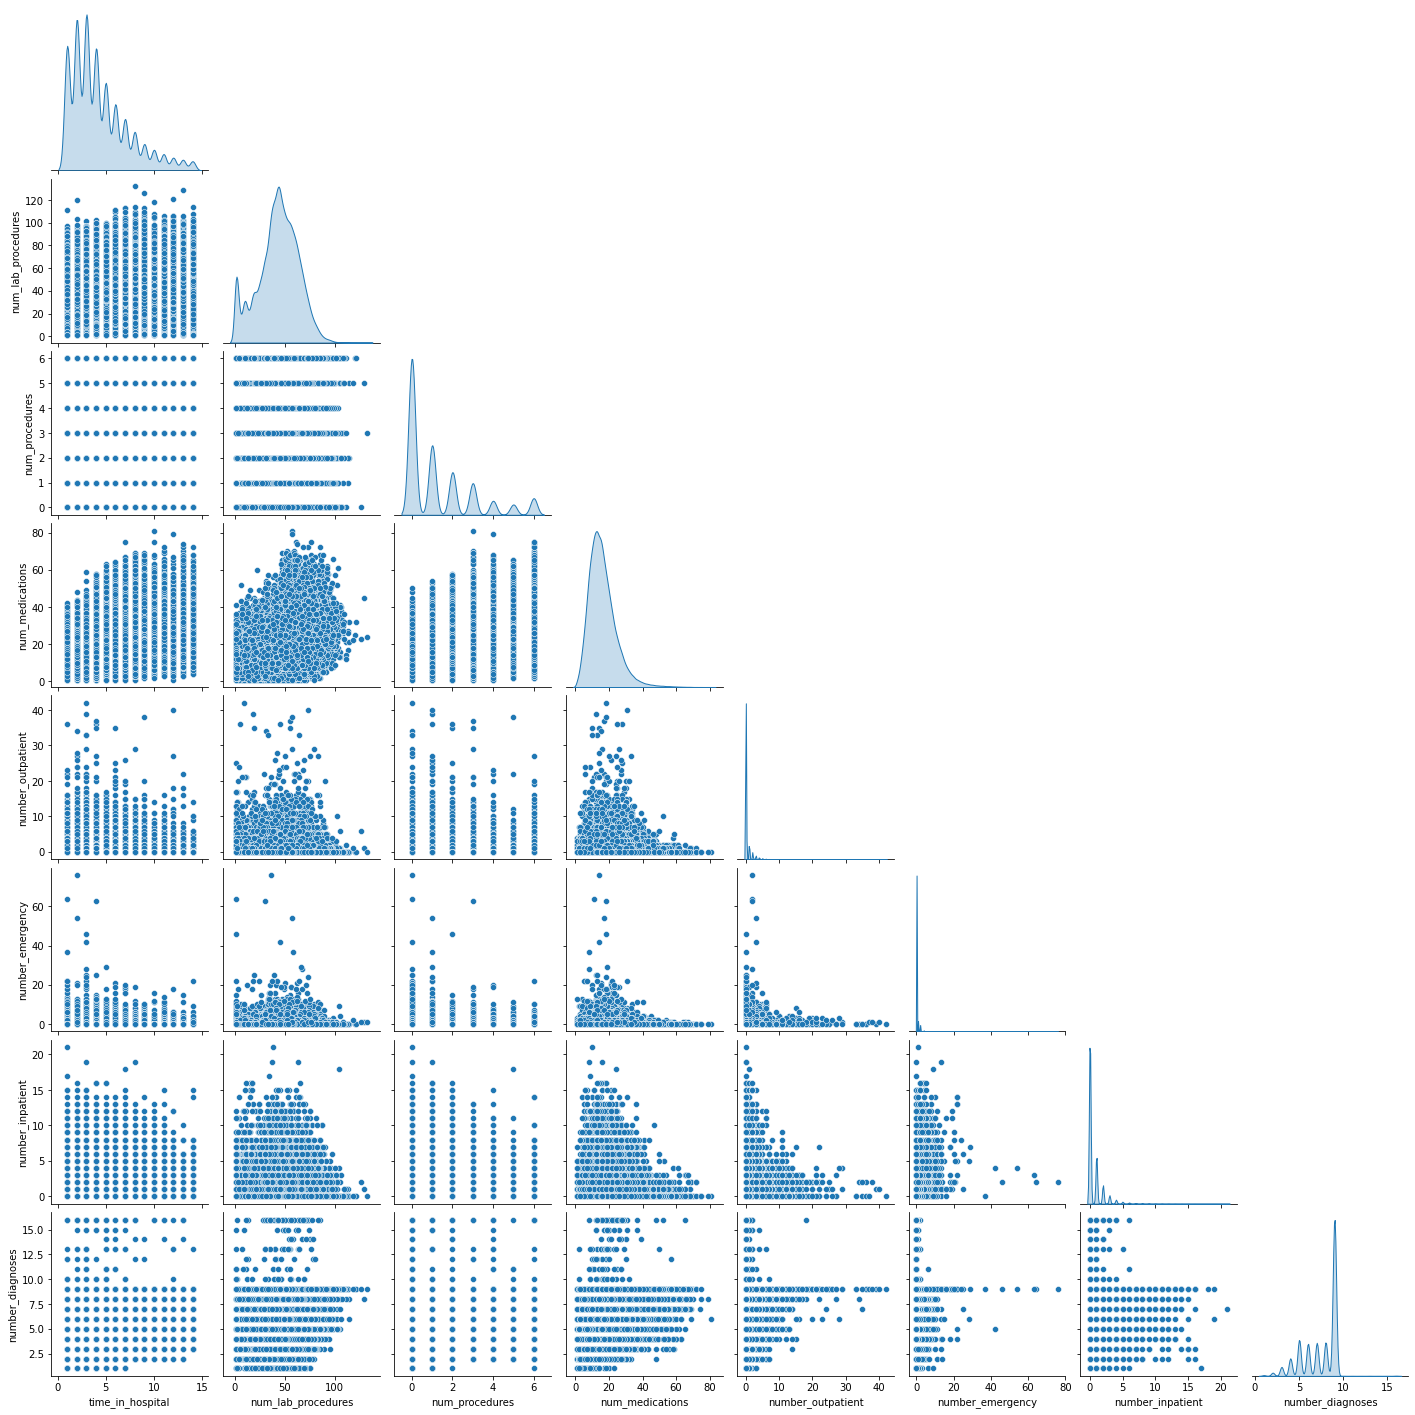

In [21]:
# Continuous predictor distributions and correlations
sns.pairplot(df[cont_vars], diag_kind='kde', corner=True)

In [22]:
plot_vars = list(cont_vars)
plot_vars.append('readmit_binary')

#### Response vs. Numeric Features
Not much visual separation or shifts in the response classes vs. the numeric variables.  These are likely poor class predictors.

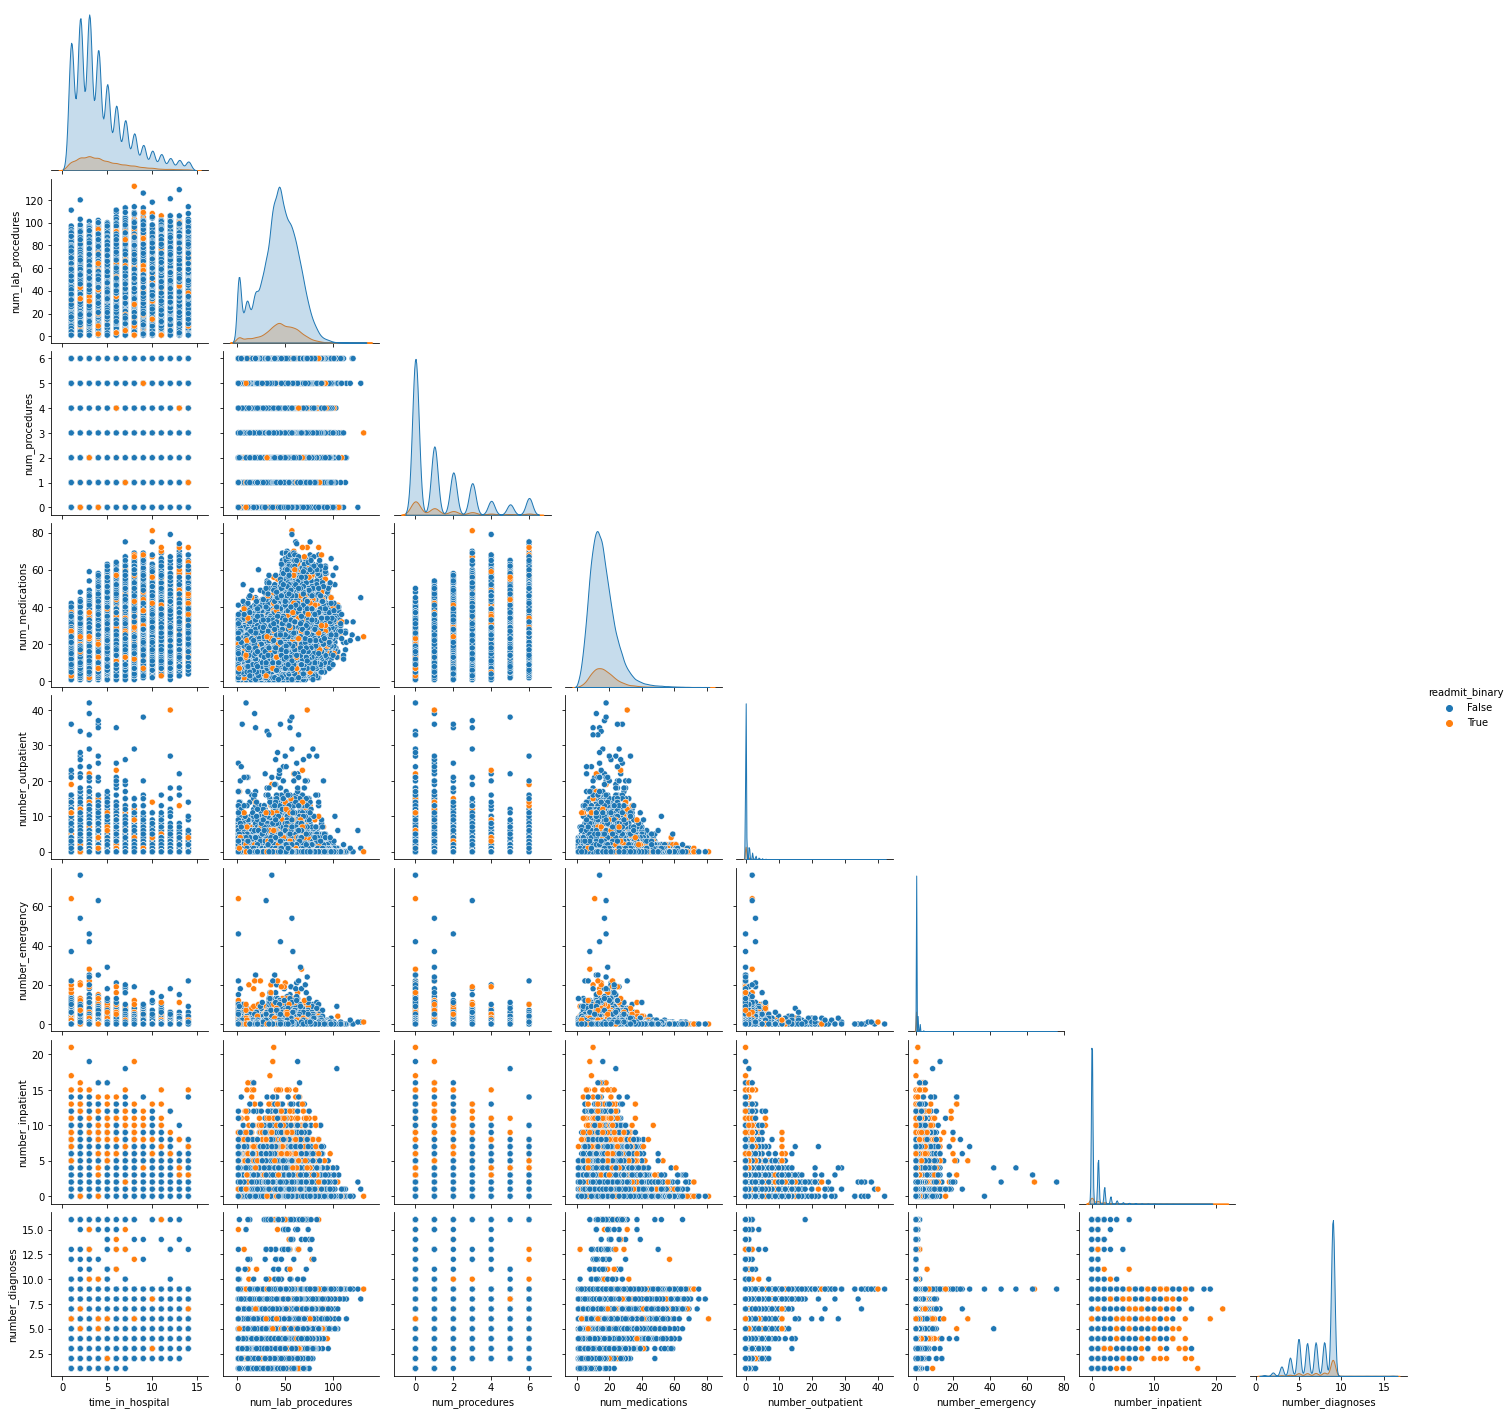

In [23]:
sns.pairplot(df[plot_vars], hue='readmit_binary', corner=True)

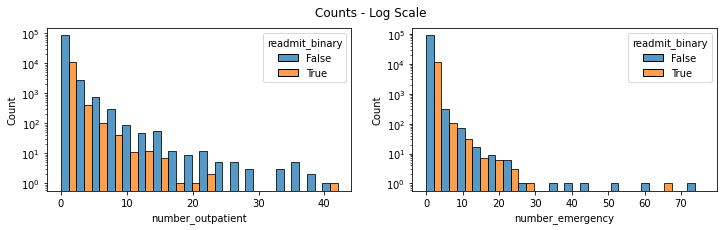

In [96]:
# Use y log scale on zero-inflated features to see counts better 

zero_inflated = ['number_outpatient', 'number_emergency']
num = len(zero_inflated)

fig, axes = plt.subplots(1, num, figsize=(12, 3))
fig.suptitle('Counts - Log Scale')
for i,j in zip(zero_inflated, range(num)):
    sns.histplot(ax = axes[j], x = df[i], hue=df['readmit_binary'], multiple="dodge", log_scale=[False, True]); 

In [25]:
# Categorical variables in the dataset
cat_vars = list( df.columns.drop(cont_vars) )

# Remove response variables
cat_vars.remove('readmitted')
cat_vars.remove('readmit_binary')
np.array(cat_vars)

array(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'], dtype='<U24')

In [102]:
# Explore categorical variables
cat_desc = df[cat_vars].describe()
cat_desc

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,99493,101766,101766,3197,101766,101766,101766,61510,51817,101745,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,8,26,17,17,72,716,...,2,3,4,4,2,2,2,2,2,2
top,Caucasian,Female,[70-80),[75-100),1,1,7,MC,InternalMedicine,428,...,No,No,No,No,No,No,No,No,No,Yes
freq,76099,54708,26068,1336,53990,60234,57494,32439,14635,6862,...,101763,101727,47383,101060,101753,101765,101764,101765,54755,78363


In [103]:
# Drop columns with only one unique value (no information for modeling)

cols = cat_desc.columns
col_drops = [c for c in cols if cat_desc[c]['unique'] == 1]
print("Material Drops", col_drops)
[cat_vars.remove(c) for c in col_drops]

print("# Categorical Variables =", len(cat_vars))

Material Drops []
# Categorical Variables = 37


In [104]:
# Drop columns with missing data
cat_vars_nonull = list(cat_vars)
[cat_vars_nonull.remove(c) for c in missing_col]
print("# Non-Missing Categorical Variables =", len(cat_vars_nonull))

# Non-Missing Categorical Variables = 30


### Feature Collinearity <a id='feature-collinearity'>


### Feature Outliers 
 

## Assumptions <a id='assumptions'>

# Model Preparations <a id='model-preparations'/>

## Sampling & Scaling Data <a id='sampling-scaling-data' />

In [105]:
# Define y and X
y = np.array(df['readmit_binary'].astype(int)) # needs to be int for Logistic Regression

X_cont = df[cont_vars]
print('# Continuous Variables =', len(cont_vars))

# One hot encoding for X[cat_vars]
X_cat = pd.get_dummies( df[cat_vars], prefix = [cat_vars][0] )
print('\n# Categorical Variables =', len(cat_vars))
print("# Dummy Variables =", X_cat.shape[1])

# Continuous Variables = 8

# Categorical Variables = 37
# Dummy Variables = 2501


In [29]:
X_cat.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
3,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [79]:
# Split the data for X[cont_vars]
X_train, X_test, y_train, y_test = train_test_split(X_cont, y, test_size = 0.3, random_state = 12343) 

# Center and Scale X
scl = StandardScaler()
scl.fit(X_train)
X_train_scaled = scl.transform(X_train) # apply to training
X_test_scaled = scl.transform(X_test) # apply to the test set (without snooping)

# Keep the feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_cont.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_cont.columns, index = X_test.index)

#### Check that the training & test set classes for y are balanced - They are good.

In [31]:
pd.DataFrame(y_train).value_counts(normalize=True)

0    0.886729
1    0.113271
dtype: float64

In [32]:
pd.DataFrame(y_test).value_counts(normalize=True)

0    0.892303
1    0.107697
dtype: float64

## Proposed Method <a id='proposed-metrics' />

## Evaluation Metrics <a id='evaluation-metrics' />

### Baseline Model

#### Use all continuous variables to predict readmittance <30 days. 
<u> Poor recall of 1-2%, and precision isn't great at ~50% </u>

In [80]:
lgr = LogisticRegression(penalty='l2', C=1.0)

scoring = ['accuracy','precision','recall','f1','roc_auc']
lgr_cont = cross_validate(lgr, X_train, y_train, cv = 3, scoring=scoring)

print( 'cv accuracies:', lgr_cont['test_accuracy'] ) # accuracies from 3 folds
print( 'cv precisions:', lgr_cont['test_precision'] ) 
print( 'cv recalls:   ', lgr_cont['test_recall'] ) 
print( 'cv f1s:       ', lgr_cont['test_f1'] )
print( 'cv AUCs:      ', lgr_cont['test_roc_auc'] ) 

cv accuracies: [0.88756001 0.88801853 0.8873447 ]
cv precisions: [0.5        0.56097561 0.47311828]
cv recalls:    [0.01385768 0.01723492 0.0164794 ]
cv f1s:        [0.02696793 0.03344238 0.03184944]
cv AUCs:       [0.63529991 0.62360354 0.62414999]


#### Use all dummy variables to predict 'readmittance' <30. 
<u> Even worse precision and recall! </u>

In [83]:
# Split the data for X[cat_vars]
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size = 0.3, random_state = 12343) 

# Dummy variables are 0 or 1, no scaling needed 

In [84]:
lgr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear') # use liblinear to get model to converge

scoring = ['accuracy','precision','recall','f1','roc_auc']
lgr_cat = cross_validate(lgr, X_train, y_train, cv = 3, scoring=scoring)

print( 'cv accuracies:', lgr_cat['test_accuracy'] ) # accuracies from 3 folds
print( 'cv precisions:', lgr_cat['test_precision'] ) 
print( 'cv recalls:   ', lgr_cat['test_recall'] ) 
print( 'cv f1s:       ', lgr_cat['test_f1'] )
print( 'cv AUCs:      ', lgr_cat['test_roc_auc'] ) 

cv accuracies: [0.88659143 0.88704991 0.88742893]
cv precisions: [0.2745098  0.36734694 0.45454545]
cv recalls:    [0.00524345 0.0067441  0.00561798]
cv f1s:        [0.01029033 0.01324503 0.01109878]
cv AUCs:       [0.62353405 0.62047223 0.616162  ]


#### Missing data is dummy-coded as its own unique level for each categorical variable.  This could be causing problems with the CV.  Remove categorical features with missing data and try baseline model.

In [57]:
# One hot encoding for X[cat_vars_nonull]
X_cat_nonull = pd.get_dummies( df[cat_vars_nonull], prefix = [cat_vars_nonull][0] )
print('# Non-Missing Categorical Variables =', len(cat_vars))
print("# Non-Missing Dummy Variables =", X_cat_nonull.shape[1])

# Non-Missing Categorical Variables = 37
# Non-Missing Dummy Variables = 145


In [63]:
X_cat_nonull.head()

,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
3,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1


#### The model below is highly sensitive to changes in random_state.  May need stratified sampling to address this, or look for outliers

In [85]:
# Split the data for X[cat_vars_nonull]
X_train, X_test, y_train, y_test = train_test_split(X_cat_nonull, y, test_size = 0.3, random_state = 12) 

# Dummy variables are 0 or 1, no scaling needed 

In [86]:
lgr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear') # use liblinear to get model to converge

scoring = ['accuracy','precision','recall','f1','roc_auc']
lgr_cat = cross_validate(lgr, X_train, y_train, cv = 3, scoring=scoring)

print( 'cv accuracies:', lgr_cat['test_accuracy'] ) # accuracies from 3 folds
print( 'cv precisions:', lgr_cat['test_precision'] ) 
print( 'cv recalls:   ', lgr_cat['test_recall'] ) 
print( 'cv f1s:       ', lgr_cat['test_f1'] )
print( 'cv AUCs:      ', lgr_cat['test_roc_auc'] ) 

C:\Users\allep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cv accuracies: [0.88793902 0.88797642 0.88785007]
cv precisions: [0.  0.5 0. ]
cv recalls:    [0.         0.00037594 0.        ]
cv f1s:        [0.         0.00075131 0.        ]
cv AUCs:       [0.61052913 0.60686599 0.61405581]


#### Try combining cont and cat_nonull features
<u> Increases AUC from 61-63% to 66% </u> 

In [87]:
X = pd.concat([X_cont, X_cat_nonull], axis=1)
X.shape

(101766, 153)

In [89]:
# Split the data for X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12) 

# Center and Scale X
scl = StandardScaler()
scl.fit(X_train)
X_train_scaled = scl.transform(X_train) # apply to training
X_test_scaled = scl.transform(X_test) # apply to the test set (without snooping)

# Keep the feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns, index = X_test.index)

In [92]:
lgr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear') # use liblinear to get model to converge

scoring = ['accuracy','precision','recall','f1','roc_auc']
lgr_cat = cross_validate(lgr, X_train, y_train, cv = 3, scoring=scoring)

print( 'cv accuracies:', lgr_cat['test_accuracy'] ) # accuracies from 3 folds
print( 'cv precisions:', lgr_cat['test_precision'] ) 
print( 'cv recalls:   ', lgr_cat['test_recall'] ) 
print( 'cv f1s:       ', lgr_cat['test_f1'] )
print( 'cv AUCs:      ', lgr_cat['test_roc_auc'] ) 

cv accuracies: [0.88734945 0.88831333 0.8876395 ]
cv precisions: [0.43137255 0.54347826 0.46788991]
cv recalls:    [0.01653514 0.01879699 0.01916573]
cv f1s:        [0.03184944 0.03633721 0.0368231 ]
cv AUCs:       [0.66532596 0.66283698 0.66013771]


## Feature Selection <a id='feature-selection' />

# Model Building & Evaluations <a id='model-building'/>

## Sampling Methodology <a id='sampling-methodology'/>

#### Per the code above we used a 70/30 train test sample split with 3 or 5 fold internal cross validation for training

## Model's Performance Analysis <a id='performance-analysis'/>

# Model Interpretability & Explainability <a id='model-explanation'>

## Examining Feature Importance <a id='examining-feature-importance'/>

# Conclusion <a id='conclusion'>

### Final Model Proposal <a id='final-model-proposal'/>

### Future Considerations and Model Enhancements <a id='model-enhancements'/>

### Alternative Modeling Approaches <a id='alternative-modeling-approaches'>